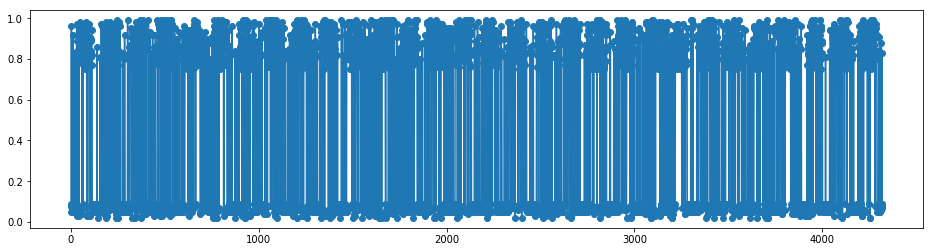

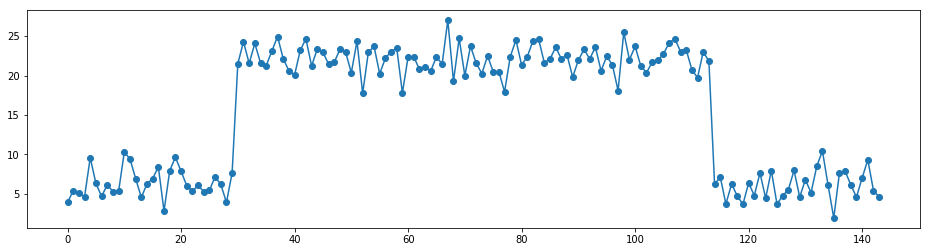

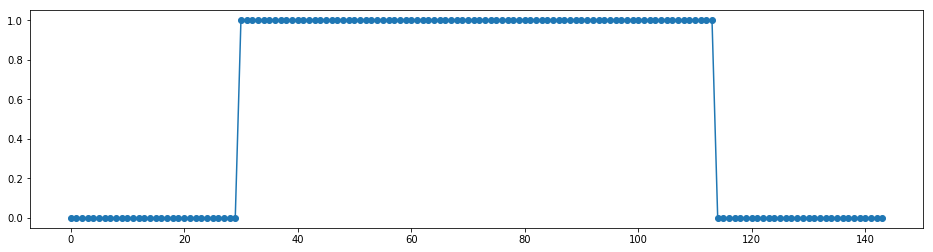

In [43]:
from scipy import signal  
import matplotlib.pyplot as plt
import numpy as np 
import random


NR_SAMPLES_PER_HOUR = 6
# 10 minutes
MINUTES_BETWEEN_SAMPLES = 60 / NR_SAMPLES_PER_HOUR
NR_SAMPLES_PER_DAY = 24 * NR_SAMPLES_PER_HOUR

def get_cpu_stats():
    def create_stats_list(start, stop, hours):
        # 0.0 ~ 1.0 -> 0% ~ 100%
        return [random.randrange(start, stop) / 100.0 for i in range(len(hours) * NR_SAMPLES_PER_HOUR)]
    stats = []
    hours = range(0, 5)
    stats.extend(create_stats_list(5, 10, hours))
    hours = range(5, 19)
    stats.extend(create_stats_list(75, 100, hours))
    hours = range(19, 24)
    stats.extend(create_stats_list(5, 10, hours))

    #return stats

    # add noise
    for i in range(30):
        x = random.randrange(0, 24*NR_SAMPLES_PER_HOUR)
        if stats[x] > 0.5:
            stats[x] = random.randrange(2, 10) / 100.0
        else:
            stats[x] = random.randrange(80, 100) / 100.0
    return stats

########################################################################
# DAYs
########################################################################
y0 = []
y1 = [0] * NR_SAMPLES_PER_DAY
days = 30
for day in range(days):
    stats = get_cpu_stats()
    y0.extend(stats)
    y1 = map(lambda a, b: a+b, y1, stats)
x0 = np.arange(len(y0))
x1 = np.arange(len(y1))

plt.figure(figsize=(16,4))
plt.plot(x0, y0, marker = 'o')
plt.show()

plt.figure(figsize=(16,4))
plt.plot(x1, y1, marker = 'o')
plt.show()

y2 = [0 if p < days/2 else 1 for p in y1]
plt.figure(figsize=(16,4))
plt.plot(x1, y2, marker = 'o')
plt.show()

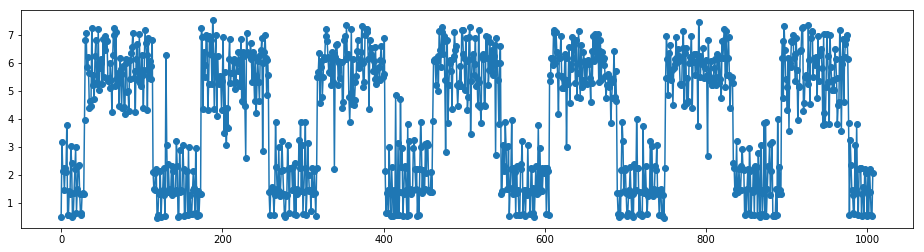

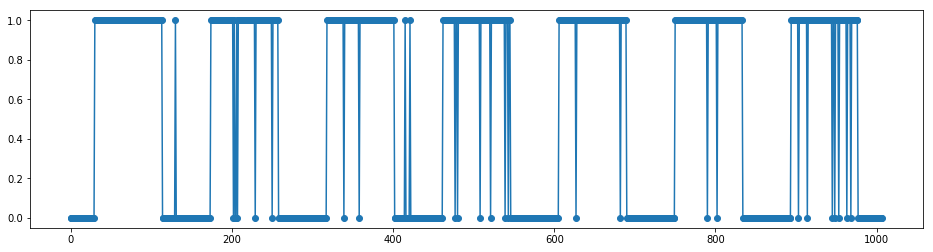

In [44]:
########################################################################
# WEEKs
########################################################################

NR_SAMPLES_PER_WEEK = NR_SAMPLES_PER_DAY * 7
def get_a_week_cpu_stats():
    y = []
    for i in range(7):
        y.extend(get_cpu_stats())
    return y

y1 = [0] * NR_SAMPLES_PER_WEEK
weeks = 8
for day in range(weeks):
    stats = get_a_week_cpu_stats()
    y1 = map(lambda a, b: a+b, y1, stats)
x1 = np.arange(len(y1))

plt.figure(figsize=(16,4))
plt.plot(x1, y1, marker = 'o')
plt.show()

y2 = [0 if p < weeks/2 else 1 for p in y1]
plt.figure(figsize=(16,4))
plt.plot(x1, y2, marker = 'o')
plt.show()

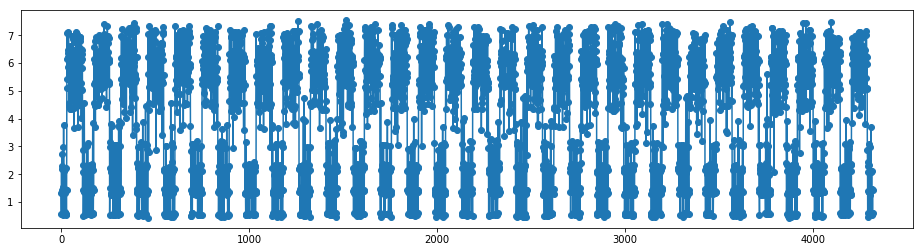

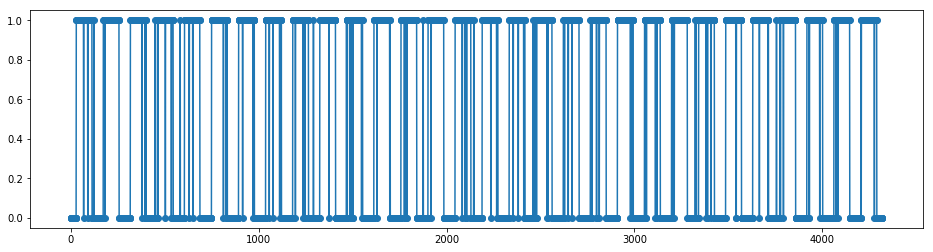

In [45]:
########################################################################
# MONTHs
########################################################################

NR_SAMPLES_PER_MONTH = NR_SAMPLES_PER_DAY * 30
def get_a_month_cpu_stats():
    y = []
    for i in range(30):
        y.extend(get_cpu_stats())
    return y

y1 = [0] * NR_SAMPLES_PER_MONTH
months = 8
for day in range(months):
    stats = get_a_month_cpu_stats()
    y1 = map(lambda a, b: a+b, y1, stats)
x1 = np.arange(len(y1))

plt.figure(figsize=(16,4))
plt.plot(x1, y1, marker = 'o')
plt.show()

y2 = [0 if p < months/2 else 1 for p in y1]
plt.figure(figsize=(16,4))
plt.plot(x1, y2, marker = 'o')
plt.show()